In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\pc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\pc\Downloads\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [7]:

df.duplicated().sum()

0

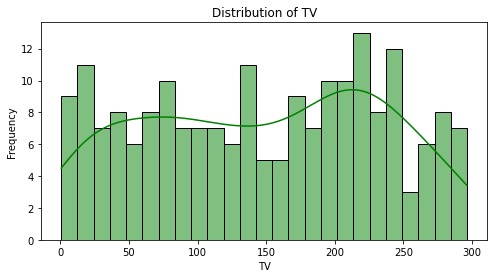

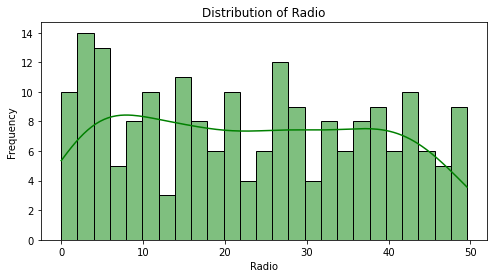

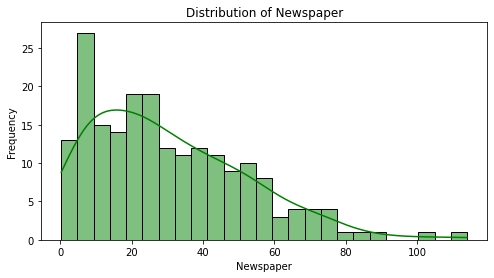

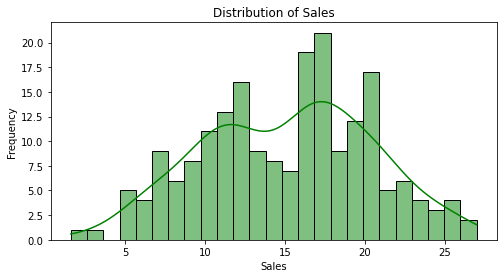

In [8]:
for feature in df.columns:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    sns.histplot(df[feature], kde=True, bins=25, color='g')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [9]:

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


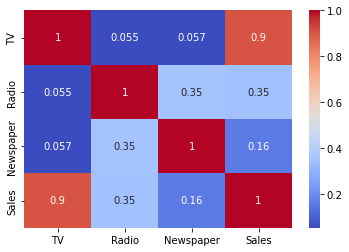

In [10]:

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

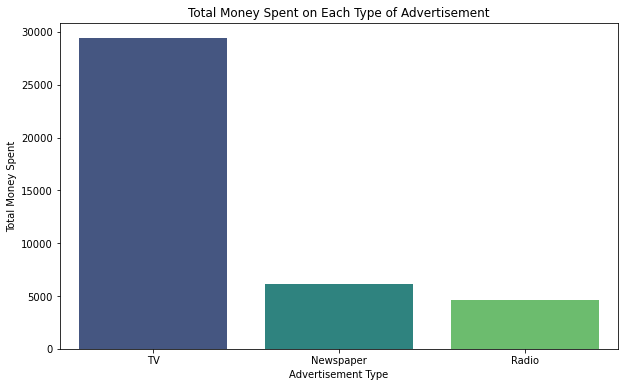

In [11]:
# Calculate total expenditure for each type of advertisement
total_tv_spend = df['TV'].sum()
total_newspaper_spend = df['Newspaper'].sum()
total_radio_spend = df['Radio'].sum()

# Data for plotting
categories = ['TV', 'Newspaper', 'Radio']
totals = [total_tv_spend, total_newspaper_spend, total_radio_spend]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=totals,palette='viridis')
plt.xlabel('Advertisement Type')
plt.ylabel('Total Money Spent')
plt.title('Total Money Spent on Each Type of Advertisement')
plt.show()

In [12]:
df['Total_spent'] = df['TV']+df['Radio']+df['Newspaper']


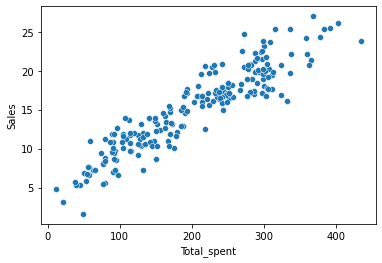

In [13]:

sns.scatterplot(x=df['Total_spent'],y=df['Sales'])
plt.show()

In [16]:

x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [17]:

from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=11)

In [19]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [ ]:

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("Mean absolute error of train data:",mean_absolute_error(y_train,y_train_pred))
print("Mean absolute error of test data:",mean_absolute_error(y_test,y_test_pred))

print("\nMean squared error of train data:",mean_squared_error(y_train,y_train_pred))
print("Mean squared error of test data:",mean_squared_error(y_test,y_test_pred))

print("\nr2 score(Train data):",r2_score(y_train,y_train_pred))
print("\nr2 score(Test data):",r2_score(y_test,y_test_pred))